In [115]:
# Libraries and data
import pandas as pd
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error

scores = pd.read_csv('/content/StudentsPerformance.csv')

In [3]:
# What the data looks like
scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
scores.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [86]:
# Create grade scale
# def assign_grade(numbers):
#         if numbers >= 90:
#             return 'A'
#         elif numbers >= 80:
#             return 'B'
#         elif numbers >= 70:
#             return 'C'
#         elif numbers >= 60:
#             return 'D'
#         else:
#             return 'F'

# scores['math_grade'] = scores['math score'].apply(assign_grade)
# scores['reading_grade'] = scores['reading score'].apply(assign_grade)
# scores['writing_grade'] = scores['writing score'].apply(assign_grade)

In [87]:
# scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_grade,reading_grade,writing_grade
0,female,group B,bachelor's degree,standard,none,72,72,74,C,C,C
1,female,group C,some college,standard,completed,69,90,88,D,A,B
2,female,group B,master's degree,standard,none,90,95,93,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,F,F
4,male,group C,some college,standard,none,76,78,75,C,C,C


In [117]:
# Did they at least pass the class?
def passed_class(score):
  if score >= 70:
    return 1
  else:
    return 0

scores['passed_math'] = scores['math score'].apply(passed_class)
scores['passed_reading'] = scores['reading score'].apply(passed_class)
scores['passed_writing'] = scores['writing score'].apply(passed_class)

In [118]:
# Did they get a perfect score?
def perfect_scores(score):
  if score >= 90:
    return 1
  else:
    return 0

scores['perfect_math'] = scores['math score'].apply(perfect_scores)
scores['perfect_reading'] = scores['reading score'].apply(perfect_scores)
scores['perfect_writing'] = scores['writing score'].apply(perfect_scores)

In [119]:
# Did they pass all their classes?
def passed_classes(row):
  if row['passed_math'] == 1 and row['passed_reading'] == 1 and row['passed_writing'] == 1:
    return 1
  else:
    return 0

scores['passed_classes'] = scores.apply(passed_classes, axis = 1)

In [120]:
# Did they did get Straight A's?
def passed_classes(row):
  if row['perfect_math'] == 1 and row['perfect_reading'] == 1 and row['perfect_writing'] == 1:
    return 1
  else:
    return 0

scores['perfect_student'] = scores.apply(passed_classes, axis = 1)

In [103]:
scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,passed_math,passed_reading,passed_writing,perfect_math,perfect_reading,perfect_writing,passed_classes,perfect_student
0,female,group B,bachelor's degree,standard,none,72,72,74,1,1,1,0,0,0,1,0
1,female,group C,some college,standard,completed,69,90,88,0,1,1,0,1,0,0,0
2,female,group B,master's degree,standard,none,90,95,93,1,1,1,1,1,1,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0,0,0,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,1,1,1,0,0,0,1,0


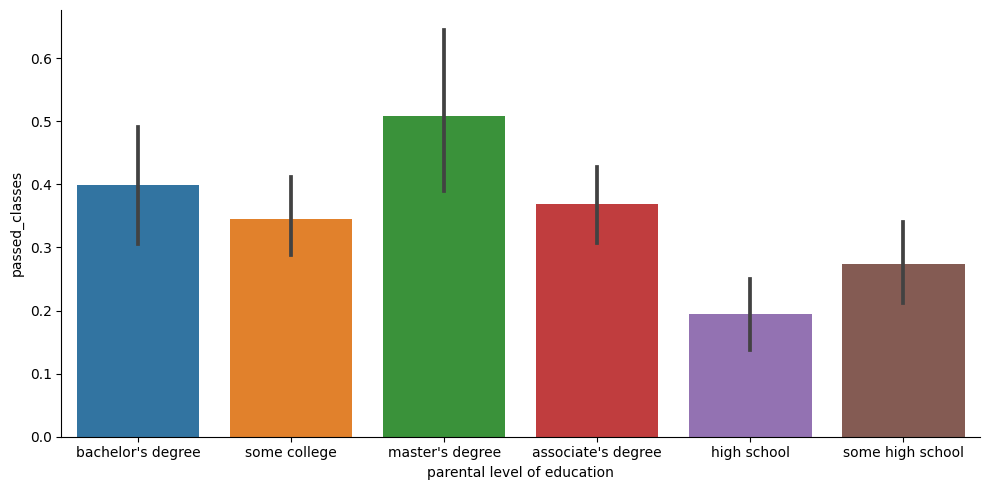

In [21]:
sns.catplot(scores, x = 'parental level of education', y = 'passed_classes', kind = 'bar', height = 5, aspect = 2)

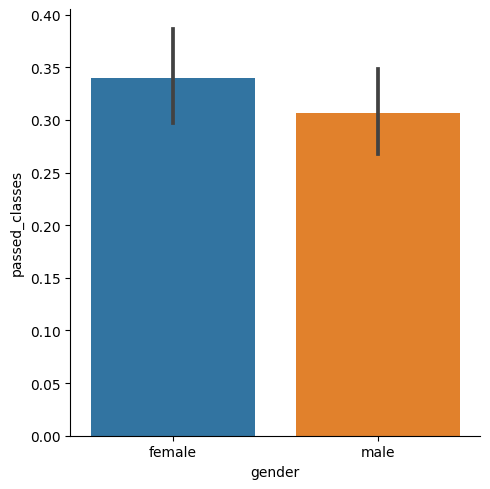

In [25]:
sns.catplot(scores, x = 'gender', y = 'passed_classes', kind = 'bar', height = 5)

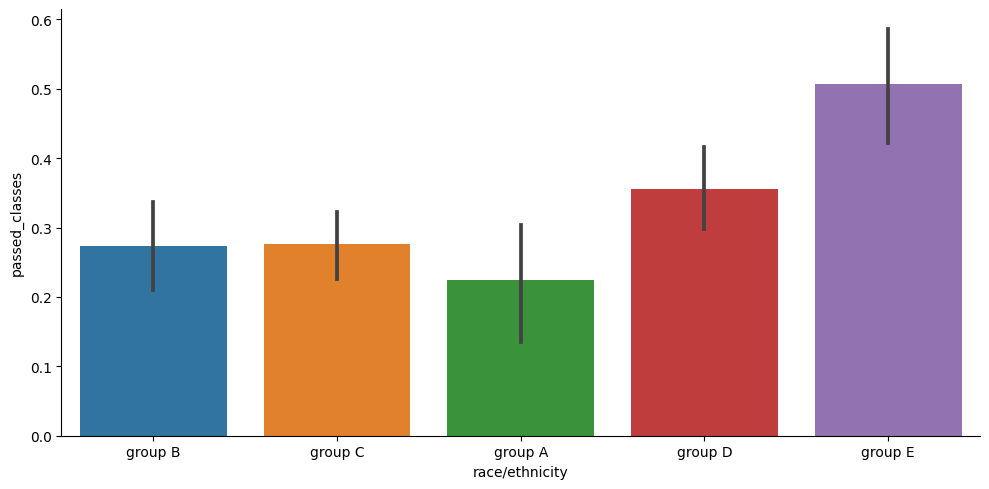

In [26]:
sns.catplot(scores, x = 'race/ethnicity', y = 'passed_classes', kind = 'bar', height = 5, aspect = 2)

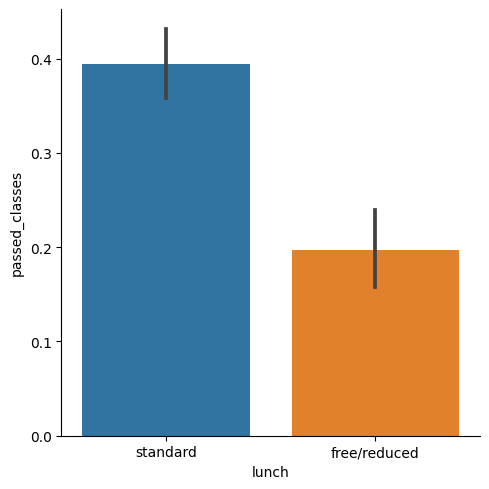

In [106]:
sns.catplot(scores, x = 'lunch', y = 'passed_classes', kind = 'bar', height = 5)

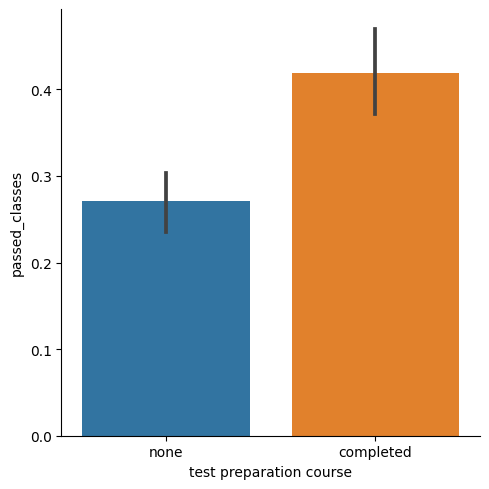

In [107]:
sns.catplot(scores, x = 'test preparation course', y = 'passed_classes', kind = 'bar', height = 5)

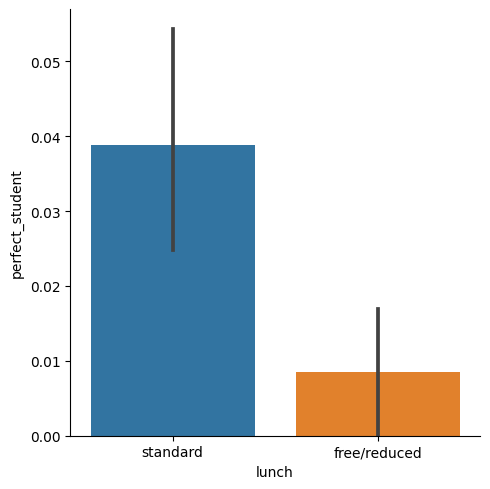

In [108]:
sns.catplot(scores, x = 'lunch', y = 'perfect_student', kind = 'bar', height = 5)

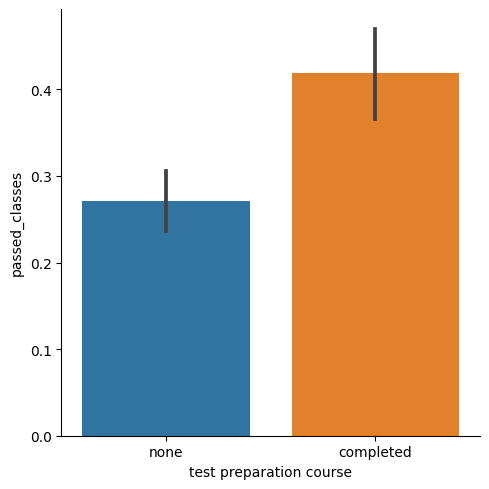

In [109]:
sns.catplot(scores, x = 'test preparation course', y = 'passed_classes', kind = 'bar', height = 5)

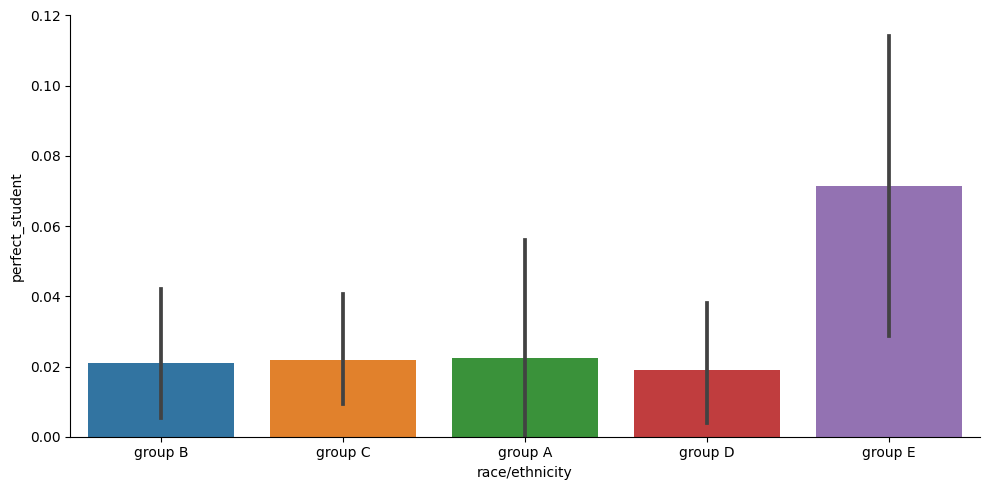

In [111]:
sns.catplot(scores, x = 'race/ethnicity', y = 'perfect_student', kind = 'bar', height = 5, aspect = 2)

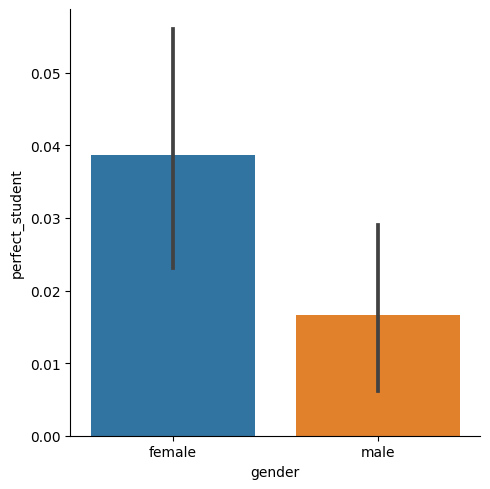

In [112]:
sns.catplot(scores, x = 'gender', y = 'perfect_student', kind = 'bar', height = 5)

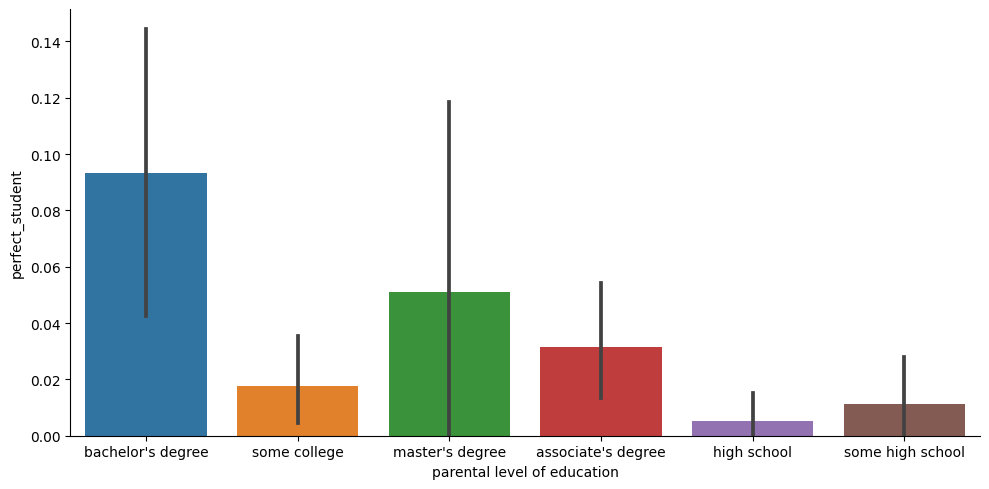

In [114]:
sns.catplot(scores, x = 'parental level of education', y = 'perfect_student', kind = 'bar', height = 5, aspect = 2)

In [121]:
scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,passed_math,passed_reading,passed_writing,perfect_math,perfect_reading,perfect_writing,passed_classes,perfect_student
0,female,group B,bachelor's degree,standard,none,72,72,74,1,1,1,0,0,0,1,0
1,female,group C,some college,standard,completed,69,90,88,0,1,1,0,1,0,0,0
2,female,group B,master's degree,standard,none,90,95,93,1,1,1,1,1,1,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0,0,0,0,0,0,0
4,male,group C,some college,standard,none,76,78,75,1,1,1,0,0,0,1,0


In [135]:
X = scores[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']]
X = pd.get_dummies(X)
y = scores['passed_classes']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [136]:
model = XGBRegressor(max_depth = 5, subsample = 0.3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [137]:
# Calculate root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.5786791414635694
